In [53]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

steam_df = pd.read_csv('steam_games.csv')
review_df=pd.read_csv('steam_reviews.csv')

In [54]:
steam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40833 entries, 0 to 40832
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   url                       40833 non-null  object 
 1   types                     40831 non-null  object 
 2   name                      40817 non-null  object 
 3   desc_snippet              27612 non-null  object 
 4   recent_reviews            2706 non-null   object 
 5   all_reviews               28470 non-null  object 
 6   release_date              37654 non-null  object 
 7   developer                 40490 non-null  object 
 8   publisher                 35733 non-null  object 
 9   popular_tags              37888 non-null  object 
 10  game_details              40313 non-null  object 
 11  languages                 40797 non-null  object 
 12  achievements              12194 non-null  float64
 13  genre                     40395 non-null  object 
 14  game_d

In [55]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434891 entries, 0 to 434890
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   date_posted             434891 non-null  object
 1   funny                   434891 non-null  int64 
 2   helpful                 434891 non-null  int64 
 3   hour_played             434891 non-null  int64 
 4   is_early_access_review  434891 non-null  bool  
 5   recommendation          434891 non-null  object
 6   review                  433375 non-null  object
 7   title                   434891 non-null  object
dtypes: bool(1), int64(3), object(4)
memory usage: 23.6+ MB


In [56]:
steam_df.drop(['url', 'types', 'mature_content', 'minimum_requirements', 'recommended_requirements'], axis=1, inplace=True)

In [57]:
steam_df.columns

Index(['name', 'desc_snippet', 'recent_reviews', 'all_reviews', 'release_date',
       'developer', 'publisher', 'popular_tags', 'game_details', 'languages',
       'achievements', 'genre', 'game_description', 'original_price',
       'discount_price'],
      dtype='object')

In [70]:
rec_df = pd.read_csv('games-features-edit.csv')

In [76]:
rec_df.drop(['IsFree', 'GenreIsNonGame', 'GenreIsIndie', 'GenreIsAction','GenreIsAdventure', 'GenreIsCasual', 'GenreIsStrategy', 'GenreIsRPG','GenreIsSimulation', 'GenreIsEarlyAccess', 'GenreIsFreeToPlay','GenreIsSports', 'GenreIsRacing', 'GenreIsMassivelyMultiplayer'], axis=1, inplace=True)

In [77]:
rec_df.columns

Index(['ResponseName', 'ReleaseDate', 'Metacritic', 'RecommendationCount',
       'PriceInitial'],
      dtype='object')

In [78]:
ByRC=rec_df.groupby(['ResponseName','RecommendationCount','Metacritic','PriceInitial'])["RecommendationCount"].agg(["sum"]).reset_index().sort_values(by="sum",ascending=False)
ByRC.head(12000)

,ResponseName,RecommendationCount,Metacritic,PriceInitial,sum
2419,2411,1427633,83,14.99,1427633
3209,3199,590480,90,0.00,590480
10390,10356,383949,92,0.00,383949
4403,4391,237684,0,9.99,237684
11606,11564,222301,0,0.00,222301
...,...,...,...,...,...
5472,5454,0,0,0.00,0
5473,5455,0,0,4.99,0
5474,5456,0,0,3.99,0
5477,5459,0,0,9.99,0


In [79]:
from sklearn.preprocessing import LabelEncoder

features=['ResponseName','ReleaseDate']
encoder=LabelEncoder()
for feature in features:
    encoder.fit(rec_df[feature])
    rec_df[feature] = encoder.transform(rec_df[feature])

In [94]:
y_rec_df = rec_df['RecommendationCount']
x_rec_df = rec_df.drop('RecommendationCount', axis = 1, inplace = False)

X_train, X_test, y_train, y_test = train_test_split(x_rec_df, y_rec_df, test_size=0.3, random_state=121)
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
print('Decision Tree Acc : {0:4f}'.format(accuracy_score(y_test,pred)))

Decision Tree Acc : 0.451954


In [99]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
print('Random Forest Acc : {0:.4f}'.format(accuracy_score(y_test,pred)))

Random Forest Acc : 0.5787


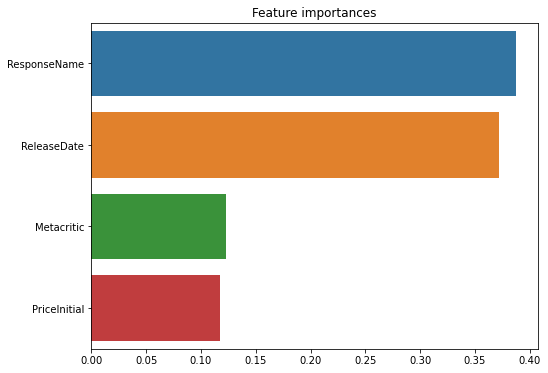

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

ftr_importances_values = rf_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns  )
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()